In [3]:
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sys.path.append('/u4/surprise/YAD_STAGIN')
from dataset import DatasetHCPRest, DatasetYADRest
yad_ds = DatasetYADRest()

[DatasetYADRest.__init__] YAD_schaefer400_sub19.pth is loaded.
[DatasetYADRest.__init__] YAD_schaefer400_sub19_resampled.pth is loaded.
[DatasetYADRest.__init__] /u4/surprise/YAD_STAGIN/data/behavior/labelled_modified.csv is loaded.
[DatasetYADRest.__init__] Done.


In [31]:
for i in range(len(yad_ds)):
    print(yad_ds[i]['timeseries'].shape)
    break

torch.Size([419, 200])


## test on stationarity : ADF test
https://www.analyticsvidhya.com/blog/2021/08/granger-causality-in-time-series-explained-using-chicken-and-egg-problem/

In [17]:
# test on stationarity : ADF test
# https://www.analyticsvidhya.com/blog/2021/08/granger-causality-in-time-series-explained-using-chicken-and-egg-problem/
from statsmodels.tsa.stattools import adfuller
ts = pd.DataFrame(yad_ds[0]['timeseries'].numpy().T)
result = ts.apply(adfuller, axis=0)
#result = res.loc[1]<0.05
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')


Test Statistics: 0                                            -12.84734
1                                                  0.0
2                                                    0
3                                                  149
4    {'1%': -3.4750180242954167, '5%': -2.881140802...
5                                           455.503469
Name: 0, dtype: object
p-value: 0                                            -9.465733
1                                                  0.0
2                                                    0
3                                                  149
4    {'1%': -3.4750180242954167, '5%': -2.881140802...
5                                           346.026874
Name: 1, dtype: object
critical_values: 0                                           -11.992298
1                                                  0.0
2                                                    0
3                                                  149
4    {'1%': -3.4750180242954167

## Inferring Granger causality

In [4]:
#http://nipy.org/nitime/examples/granger_fmri.html
import nitime
import nitime.analysis as nta
import nitime.timeseries as ts
import nitime.utils as tsu

TR = 1.5
f_lb, f_ub = 0.02, 0.6
data = yad_ds[0]['timeseries']
#pdata = tsu.percent_change(data)
time_series = ts.TimeSeries(data, sampling_interval=TR)


In [ ]:

G = nta.GrangerAnalyzer(time_series)
freq_idx_G = np.where((G.frequencies > f_lb) * (G.frequencies < f_ub))[0]
g1 = np.mean(G.causality_xy[:, :, freq_idx_G], -1)
g2 = np.mean(G.causality_yx[:, :, freq_idx_G], -1)
#Coh = nta.CoherenceAnalyzer(time_series)
#Cor = nta.CorrelationAnalyzer(time_series)

<AxesSubplot:>

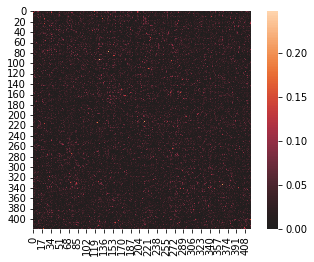

In [22]:
gc_mtx = np.nan_to_num(g1,0).T+np.nan_to_num(g2,0)
sns.heatmap(gc_mtx, square=True, center=0)

In [26]:
np.where(gc_mtx==np.max(gc_mtx))

(array([173]), array([105]))

In [5]:
data

tensor([[-0.2388,  0.1203, -0.1744,  ...,  0.3251,  0.0897, -0.5569],
        [ 0.1670,  0.1281,  0.3578,  ..., -0.4441, -0.3658, -0.1660],
        [ 1.5683,  2.4531,  3.3395,  ...,  0.4350,  0.4413, -1.1401],
        ...,
        [-0.6969, -0.1674, -0.6427,  ..., -0.3084, -0.2830, -0.1394],
        [ 0.8023, -0.6861,  0.7211,  ...,  1.4353,  1.9675,  1.6288],
        [-0.2299,  0.4550, -0.0235,  ...,  0.8196,  1.2475,  0.9011]])

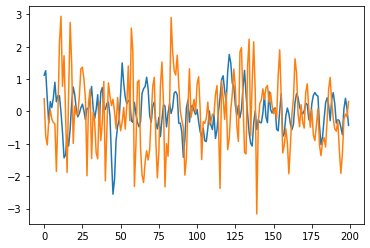

In [34]:
import matplotlib.pyplot as plt
data = yad_ds[0]['timeseries']
plt.plot(data[173,:])
plt.plot(data[106,:])

In [35]:
from sklearn.svm import SVR
SVR().get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [54]:
import pandas as pd
file_path = "/u3/Data/YAD_TS/excluded_mask_Samsung/ExcludedROIs400.txt"
exclude_roi_index = pd.read_csv(file_path, header=None).values.squeeze()


In [57]:
exclude_roi_index

NameError: name 'exclude_roi_index' is not defined

In [60]:
data

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5